## Importation des librairies

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
# Afficher les cinq premières lignes de l'ensemble de Données
df = pd.read_csv("D:\Données\Fraud Detection Dataset.csv")
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Ezéchiel\AppData\Local\Temp\ipykernel_16480\338198520.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\Données\Fraud Detection Dataset.csv")


,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


## Prétraitement des données

In [ ]:
# Description de l'ensemble de donnée
df.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


In [ ]:
# Information sur l'ensemble de donnée
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [ ]:
# Les types de donnée du dataset
df.dtypes.to_frame()

,0
Transaction_ID,object
User_ID,int64
Transaction_Amount,float64
Transaction_Type,object
Time_of_Transaction,float64
Device_Used,object
Location,object
Previous_Fraudulent_Transactions,int64
Account_Age,int64
Number_of_Transactions_Last_24H,int64


In [ ]:
# Dimenssion de l'ensemble de donnée
df.shape

(51000, 12)

In [ ]:
# Les doublons de l'ensemble de donnée
df.duplicated().sum()

881

In [ ]:
# Supprimer les doublons
df_cleaned = df.drop_duplicates()

# Afficher le DataFrame sans doublons
df_cleaned.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


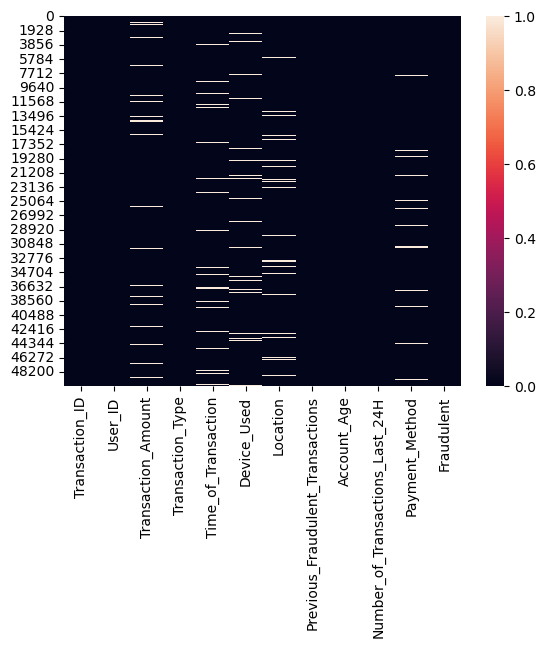

In [ ]:
# Les valeurs manquantes
sns.heatmap(df_cleaned.isnull())
plt.show()

C:\Users\Ezéchiel\AppData\Local\Temp\ipykernel_16480\938586370.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[column].fillna(mode_value, inplace=True)
C:\Users\Ezéchiel\AppData\Local\Temp\ipykernel_16480\938586370.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column].fillna(mode_value, inplace=True)
C:\Users\Ez

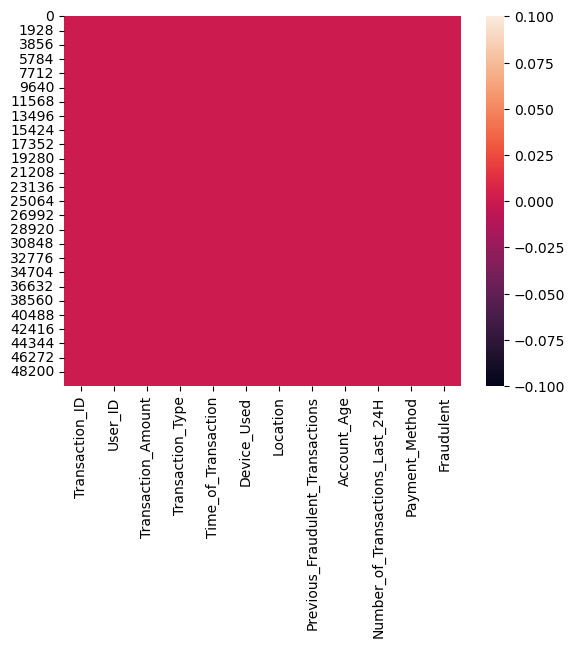

In [ ]:
# Gestion des valeurs manquantes en remplaçant les valeurs catégorielles par le mode et numériques par la moyenne
def handle_missing_values(df_cleaned):
    for column in df_cleaned.columns:
        if df_cleaned[column].dtype in ['object', 'category']:  # Colonnes catégorielles
            mode_value = df_cleaned[column].mode()[0]  # Calcul du mode
            df_cleaned[column].fillna(mode_value, inplace=True)
        elif np.issubdtype(df[column].dtype, np.number):  # Colonnes numériques
            mean_value = df_cleaned[column].mean()  # Calcul de la moyenne
            df_cleaned[column].fillna(mean_value, inplace=True)

# Appliquer la fonction au DataFrame
handle_missing_values(df_cleaned)

# Afficher le DataFrame après traitement
sns.heatmap(df_cleaned.isnull())
plt.show()

C:\Users\Ezéchiel\AppData\Local\Temp\ipykernel_16480\2959738717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraudulent', data=df_cleaned, palette='coolwarm')


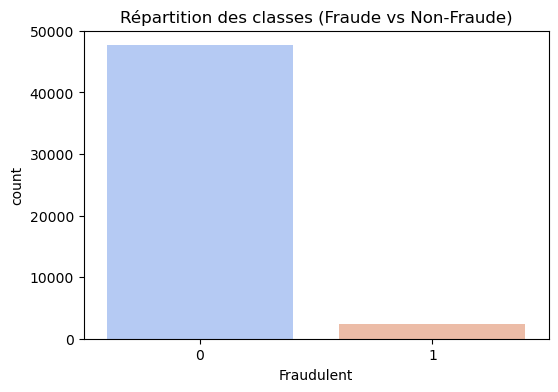

In [ ]:
# Vérifier l'équilibre des classes
plt.figure(figsize=(6,4))
sns.countplot(x='Fraudulent', data=df_cleaned, palette='coolwarm')
plt.title("Répartition des classes (Fraude vs Non-Fraude)")
plt.show()

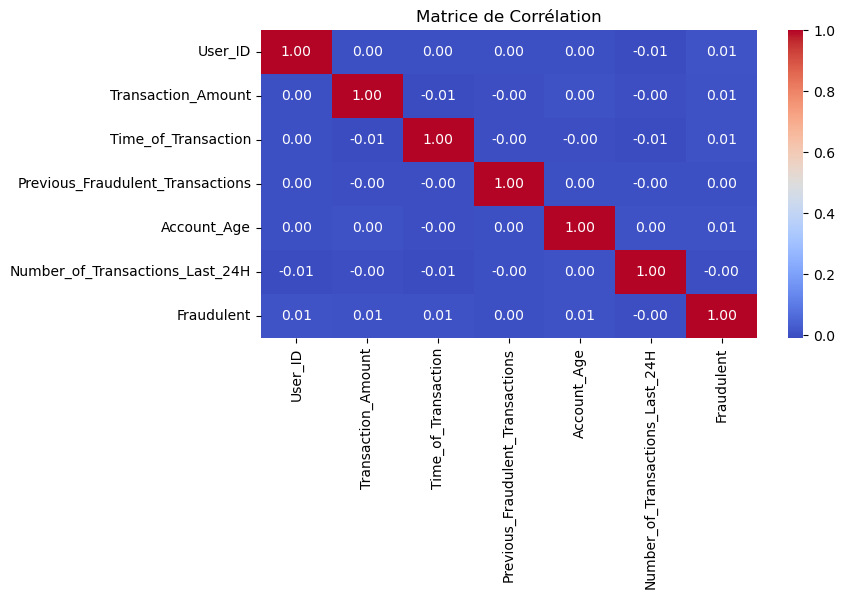

In [ ]:
# Filtrer uniquement les colonnes numériques
df_numeric = df_cleaned.select_dtypes(include=[np.number])

# Vérifier si le DataFrame contient encore des valeurs avant de tracer la heatmap
if df_numeric.shape[1] > 1:  # Vérifie s'il y a au moins deux colonnes numériques
    plt.figure(figsize=(8, 4))
    sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title("Matrice de Corrélation")
    plt.show()

In [ ]:
df_cleaned.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Time_of_Transaction', 'Device_Used', 'Location',
       'Previous_Fraudulent_Transactions', 'Account_Age',
       'Number_of_Transactions_Last_24H', 'Payment_Method', 'Fraudulent'],
      dtype='object')